In [ ]:
# python 3.10.9에서 작성 되었습니다.

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('한국자산관리공사_국유부동산 매각현황_20221231.csv',encoding='cp949')

In [ ]:
df1

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000.0,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


# 전처리

# 매각만 분리

In [ ]:
df1['처분구분명'].unique()

array(['처분(매각수의)', '처분(무상관리전환)', '처분(매각입찰)', '처분(유상관리전환)', '처분(무상양여)',
       '처분(유상양여)', '처분(사용승인)', '처분(무상귀속)'], dtype=object)

In [ ]:
df2 = df1[df1['처분구분명'].apply(lambda x : x.startswith('처분(매각'))]

In [ ]:
df2['처분구분명'].unique()

array(['처분(매각수의)', '처분(매각입찰)'], dtype=object)

# 매각 면적 0 제거

In [ ]:
df3 = df2[df2['대장면적(제곱미터)'] > 0]

# 공부지목 nan값 제거

In [ ]:
df3['공부지목'].unique()

array(['전', '임야', '답', '도로', '대', '묘지', '확인불가', '잡종지', '하천', '주유소용지',
       '과수원', '목장용지', '구거', '유지', '공장용지', '철도용지', '수도용지', '제방', '주차장',
       '학교용지', '양어장', '종교용지', '창고용지', '체육용지', '유원지', '사적지', '공원', '염전',
       '광천지', nan], dtype=object)

In [ ]:
df3['공부지목'] = df3['공부지목'].fillna('확인불가')

C:\Users\qkdf1\AppData\Local\Temp\ipykernel_26284\909043563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['공부지목'] = df3['공부지목'].fillna('확인불가')


In [ ]:
df3['공부지목'].unique()

array(['전', '임야', '답', '도로', '대', '묘지', '확인불가', '잡종지', '하천', '주유소용지',
       '과수원', '목장용지', '구거', '유지', '공장용지', '철도용지', '수도용지', '제방', '주차장',
       '학교용지', '양어장', '종교용지', '창고용지', '체육용지', '유원지', '사적지', '공원', '염전',
       '광천지'], dtype=object)

# 팀명 nan값 제거

In [ ]:
df3['팀명'].isna().unique()

array([False,  True])

In [ ]:
df3['팀명'].unique()

array(['국유재산관리1팀', '국유울산팀', '국유재산관리2팀', '국유춘천팀', '국유목포팀', '국유여수팀',
       '국유제주팀', '국유팀', '국유광주2팀', '국유원주팀', '국유진주팀', '내포지부', '국유재산관리팀',
       '국유 충주팀', '재산관리3팀', '국유군산팀', '국유재산관리3팀', '국유 안동팀', '국유 포항팀',
       '의정부팀', '재산관리2팀', '국유광주1팀', '국유평택팀', '재산관리1팀', '재산관리5팀', '국유통영팀',
       '재산관리4팀', '재산관리6팀', '팀미정', '국유목포지부', '국유여수지부', '국유제주지부', '포항지부',
       '안동지부', '국유재산1팀', '국유재산3팀', '의정부지부', '국유광주3팀', '국유재산2팀', '울산지부',
       '국유재산관리4팀', '기획관리팀', '원주지부', '국유1팀', '국유2팀', '춘천지부', '국유진주지부',
       '국유통영지부', '국유광주4팀', '국유목포지사', '국유여수지사', '내포지사', '충주지사', '군산지사',
       '국유진주지사', '국유통영지사', '포항지사', '안동지사', '국유제주지사', '울산지사', '국유재산관리5팀',
       '평택지사', '의정부지사', '원주지사', '춘천지사', '해안면무주지국유화지원추진단', nan],
      dtype=object)

In [ ]:
target = ['국유재산관리1팀', '국유울산팀', '국유재산관리2팀', '국유춘천팀', '국유목포팀', '국유여수팀',
       '국유제주팀', '국유팀', '국유광주2팀', '국유원주팀', '국유진주팀', '내포지부', '국유재산관리팀',
       '국유 충주팀', '재산관리3팀', '국유군산팀', '국유재산관리3팀', '국유 안동팀', '국유 포항팀',
       '의정부팀', '재산관리2팀', '국유광주1팀', '국유평택팀', '재산관리1팀', '재산관리5팀', '국유통영팀',
       '재산관리4팀', '재산관리6팀', '팀미정', '국유목포지부', '국유여수지부', '국유제주지부', '포항지부',
       '안동지부', '국유재산1팀', '국유재산3팀', '의정부지부', '국유광주3팀', '국유재산2팀', '울산지부',
       '국유재산관리4팀', '기획관리팀', '원주지부', '국유1팀', '국유2팀', '춘천지부', '국유진주지부',
       '국유통영지부', '국유광주4팀', '국유목포지사', '국유여수지사', '내포지사', '충주지사', '군산지사',
       '국유진주지사', '국유통영지사', '포항지사', '안동지사', '국유제주지사', '울산지사', '국유재산관리5팀',
       '평택지사', '의정부지사', '원주지사', '춘천지사', '해안면무주지국유화지원추진단']
df = df3[df3['팀명'].apply(lambda x : x in target)]

# 매각 금액이 가장 많은 팀과 하위 팀의 차이 확인하기

In [ ]:
df['팀명'].unique()

array(['국유재산관리1팀', '국유울산팀', '국유재산관리2팀', '국유춘천팀', '국유목포팀', '국유여수팀',
       '국유제주팀', '국유팀', '국유광주2팀', '국유원주팀', '국유진주팀', '내포지부', '국유재산관리팀',
       '국유 충주팀', '재산관리3팀', '국유군산팀', '국유재산관리3팀', '국유 안동팀', '국유 포항팀',
       '의정부팀', '재산관리2팀', '국유광주1팀', '국유평택팀', '재산관리1팀', '재산관리5팀', '국유통영팀',
       '재산관리4팀', '재산관리6팀', '팀미정', '국유목포지부', '국유여수지부', '국유제주지부', '포항지부',
       '안동지부', '국유재산1팀', '국유재산3팀', '의정부지부', '국유광주3팀', '국유재산2팀', '울산지부',
       '국유재산관리4팀', '기획관리팀', '원주지부', '국유1팀', '국유2팀', '춘천지부', '국유진주지부',
       '국유통영지부', '국유광주4팀', '국유목포지사', '국유여수지사', '내포지사', '충주지사', '군산지사',
       '국유진주지사', '국유통영지사', '포항지사', '안동지사', '국유제주지사', '울산지사', '국유재산관리5팀',
       '평택지사', '의정부지사', '원주지사', '춘천지사', '해안면무주지국유화지원추진단'], dtype=object)

In [ ]:
dfs = pd.DataFrame(df.groupby('팀명')['대장금액(원)'].sum())

In [ ]:
dfs

,대장금액(원)
팀명,
국유 안동팀,7.819281e+09
국유 충주팀,2.378839e+10
국유 포항팀,3.570669e+10
국유1팀,1.057947e+10
국유2팀,1.448434e+10
...,...
팀미정,4.876852e+09
평택지사,4.424125e+10
포항지부,2.699168e+10


In [ ]:
dfs.idxmax()

대장금액(원)    국유재산3팀
dtype: object

In [ ]:
dfs.max()

대장금액(원)    1.014499e+12
dtype: float64


In [ ]:
dfs.idxmin()

대장금액(원)    해안면무주지국유화지원추진단
dtype: object

In [ ]:
dfs.min()

대장금액(원)    22101960.0
dtype: float64

In [ ]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
m1 = df['팀명'] == '국유재산3팀'
n1 = df['팀명'] == '해안면무주지국유화지원추진단'

In [ ]:
m = df[m1]['대장금액(원)']
n = df[n1]['대장금액(원)']

In [ ]:
ttest = stats.ttest_ind(m, n)

In [ ]:
ttest.pvalue

0.9407620103481295

In [ ]:
ttest.statistic

0.07431574901938794

In [ ]:
stats.shapiro(m)

C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.00950312614440918, pvalue=0.0)

In [ ]:
stats.shapiro(n)

ShapiroResult(statistic=0.8970823287963867, pvalue=0.41671162843704224)

In [ ]:
stats.ks_2samp(m, n)

KstestResult(statistic=0.6215538847117794, pvalue=0.051754877223033006, statistic_location=9587400.0, statistic_sign=-1)

# 부점 구분으로 수정 - 매각 금액이 가장 많은 팀과 하위 팀의 차이 확인하기

In [ ]:
dfa = df.groupby(['부점명','팀명']).agg({'대장금액(원)' : sum})

In [ ]:
dfa.idxmax()

대장금액(원)    (서울동부지역본부, 국유재산3팀)
dtype: object

In [ ]:
dfa.max()

대장금액(원)    5.321157e+11
dtype: float64

In [ ]:
dfa.idxmin()

대장금액(원)    (국유재산기획처, 팀미정)
dtype: object

In [ ]:
dfa.min()

대장금액(원)    15087644.0
dtype: float64

# 연도별 매각금액 추이 확인하기

In [ ]:
from sklearn.datasets import load_iris
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm

C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\l

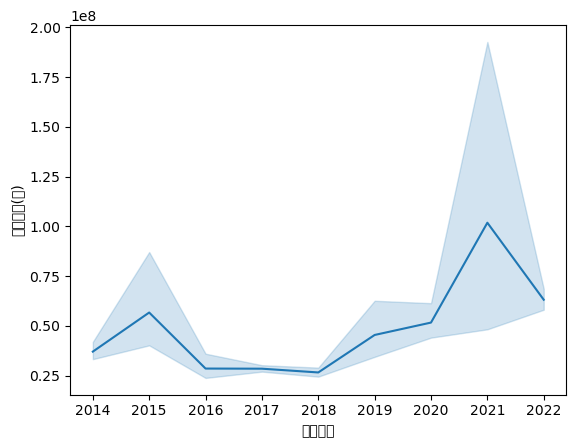

In [ ]:
sns.lineplot(data = df, x = '연도구분', y = '대장금액(원)')
plt.show()

In [ ]:
[f.name for f in fm.fontManager.ttflist]

['STIXSizeFiveSym',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'cmr10',
 'cmtt10',
 'DejaVu Sans',
 'DejaVu Serif',
 'cmss10',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'cmex10',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'cmmi10',
 'cmsy10',
 'STIXNonUnicode',
 'DejaVu Sans Display',
 'DejaVu Serif Display',
 'cmb10',
 'STIXSizeTwoSym',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'Papyrus',
 'Rubik',
 'Franklin Gothic Demi Cond',
 'Linux Libertine G',
 'Wingdings 3',
 'Gill Sans MT',
 'Noto Sans Lisu',
 'Perpetua',
 'Segoe UI Historic',
 'Noto Sans Georgian',
 'Georgia',
 'Gill Sans MT',
 'DejaVu Sans',
 'Gabriola',
 'Candara',
 'Carlito',
 'Eras Medium ITC',
 'Liberation Serif',
 'Noto Sans',
 'Leelawadee UI',
 'N

In [ ]:
plt.rc('font', family='Malgun Gothic')

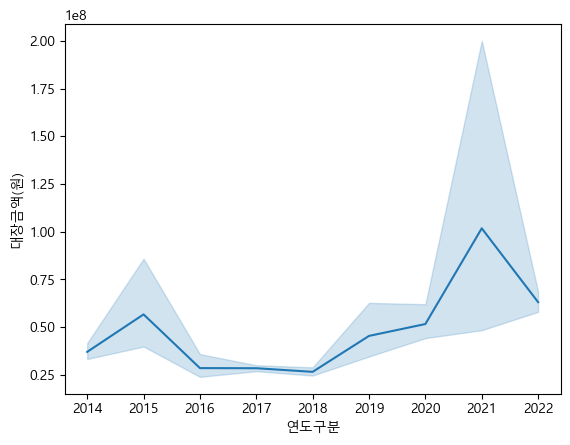

In [ ]:
sns.lineplot(data = df, x = '연도구분', y = '대장금액(원)')
plt.show()

# 상위 5개 지역별 매각 면적 확인하기

In [ ]:
dfb = df.groupby(['부점명','팀명']).agg({'대장면적(제곱미터)' : sum})

In [ ]:
dfb

대장면적(제곱미터)
부점명    팀명                   
강원지역본부 국유1팀       372155.281
       국유2팀       536371.200
       국유원주팀      948216.000
       국유춘천팀     2163883.000
       국유팀       4414675.000
...                      ...
충북지역본부 국유재산관리1팀    58162.450
       국유재산관리2팀   347405.500
       국유재산관리팀    891385.000
       충주지사       491023.780
       팀미정          3641.000

[112 rows x 1 columns]

In [ ]:
dfc = dfb.nlargest(5, '대장면적(제곱미터)', keep='first')

In [ ]:
dfc

대장면적(제곱미터)
부점명      팀명                   
강원지역본부   국유팀       4414675.000
         국유춘천팀     2163883.000
대전충남지역본부 내포지사      1952206.696
전북지역본부   국유재산관리1팀  1730079.900
광주전남지역본부 국유광주2팀    1489381.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


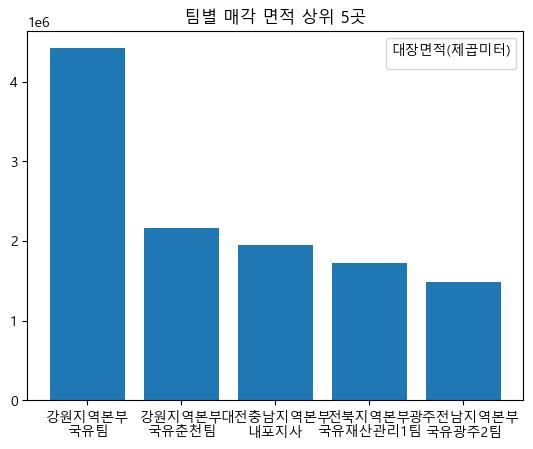

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

팀명 = ['강원지역본부\n국유팀', '강원지역본부\n국유춘천팀', '대전충남지역본부\n내포지사',
      '전북지역본부\n국유재산관리1팀', '광주전남지역본부\n국유광주2팀']
counts = [4414675.000, 2163883.000, 1952206.696, 1730079.900, 1489381.000]

ax.bar(팀명, counts)


ax.set_title('팀별 매각 면적 상위 5곳')
ax.legend(title='대장면적(제곱미터)')

plt.show()

In [ ]:
dfd = pd.DataFrame(df.groupby('지역구분')['대장면적(제곱미터)'].sum())

In [ ]:
dfd

,대장면적(제곱미터)
지역구분,
강원도,9584364.950
경기도,8319993.462
경상남도,4400455.356
경상북도,4857939.602
광주광역시,1260222.536
대구광역시,406469.392
대전광역시,319324.575
부산광역시,1430846.754
서울특별시,632627.670


In [ ]:
dfe = dfd.nlargest(5, '대장면적(제곱미터)', keep='first')

In [ ]:
dfe

,대장면적(제곱미터)
지역구분,
강원도,9584364.950
경기도,8319993.462
전라남도,5811610.737
전라북도,4984516.275
경상북도,4857939.602


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


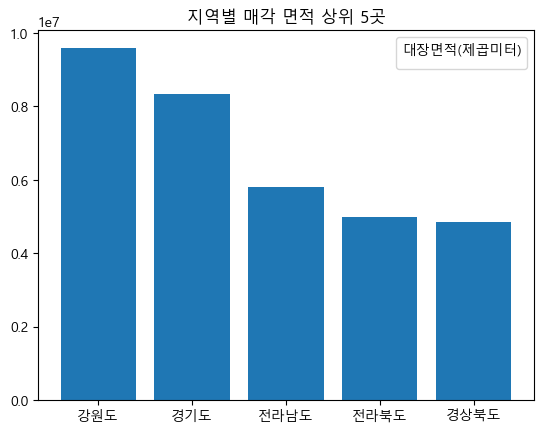

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

팀명 = ['강원도', '경기도', '전라남도', '전라북도', '경상북도']
counts = [9584364.950, 8319993.462, 5811610.737, 4984516.275, 4857939.602]

ax.bar(팀명, counts)


ax.set_title('지역별 매각 면적 상위 5곳')
ax.legend(title='대장면적(제곱미터)')

plt.show()

# 계약 일자 정보 기준으로, 매각이 많은 때의 특징 알아보기

In [ ]:
df

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000.0,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


In [ ]:
df11 = df.groupby('계약일자')['대장금액(원)'].describe()

In [ ]:
df12 = df.groupby('계약일자')['대장면적(제곱미터)'].describe()

In [ ]:
d1 = df11.nlargest(5, 'count', keep='first')

In [ ]:
d2 = df12.nlargest(5, 'count', keep='first')

In [ ]:
d1

,count,mean,std,min,25%,50%,75%,max
계약일자,,,,,,,,
2017-12-01,592.0,4.298843e+07,6.421650e+07,30100.0,4310975.0,16365600.0,51383250.0,4.134888e+08
2022-07-25,486.0,8.575855e+07,6.111482e+08,128330.0,4481125.0,15364270.0,39138945.0,1.187670e+10
2020-04-01,442.0,1.587431e+06,3.079203e+06,9600.0,132800.0,467500.0,1550875.0,3.594256e+07
2019-08-29,431.0,8.840090e+07,3.039503e+08,108360.0,5797395.0,16980000.0,66055562.0,4.422430e+09
2017-10-27,412.0,1.943967e+07,5.000375e+07,4270.0,2116425.0,5922850.0,17061250.0,7.042840e+08


In [ ]:
d2

,count,mean,std,min,25%,50%,75%,max
계약일자,,,,,,,,
2017-12-01,592.0,384.964527,688.412992,1.0,38.75,132.0,437.50,5304.0
2022-07-25,486.0,107.620833,408.040552,0.3,10.00,24.0,82.75,7788.0
2020-04-01,442.0,159.735294,286.035161,1.0,16.25,53.0,162.00,2961.0
2019-08-29,431.0,187.232019,659.302120,1.0,16.00,40.0,134.50,6873.0
2017-10-27,412.0,171.742718,418.700785,1.0,8.00,31.0,113.25,3722.0


In [ ]:
target1 = ['2017-12-01', '2022-07-25', '2020-04-01','2019-08-29', '2017-10-27']
df10 = df[df['계약일자'].apply(lambda x : x in target1)]

In [ ]:
d10 = pd.DataFrame(df10.groupby('계약일자')['지역구분'].value_counts())

In [ ]:
d10

지역구분
계약일자       지역구분         
2017-10-27 부산광역시     272
           경상북도       32
           경기도        21
           전라남도       20
           전라북도       17
           경상남도       15
           충청남도       13
           강원도        10
           충청북도        4
           서울특별시       3
           광주광역시       2
           인천광역시       2
           대전광역시       1
2017-12-01 부산광역시     528
           전라남도       17
           경상북도       14
           경기도        11
           경상남도        6
           강원도         5
           전라북도        4
           충청남도        3
           제주특별자치도     2
           대구광역시       1
           충청북도        1
2019-08-29 부산광역시     388
           경상북도        7
           대전광역시       6
           전라남도        6
           전라북도        6
           경기도         5
           경상남도        5
           서울특별시       3
           강원도         2
           충청남도        2
           인천광역시       1
2020-04-01 경상남도      423
           전라북도        9
           충청북도        4
           강원도         3
           경기도         3
2022-07-25 부산광역시     403
           경상남도       58
           경기도         7
           충청북도        5
           제주특별자치도     4
           전라남도        3
           전라북도        3
           경상북도        1
           서울특별시       1
           울산광역시       1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


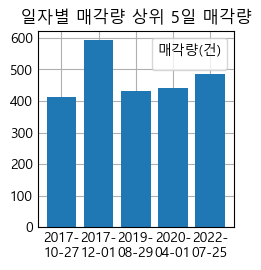

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

팀명 = ['2017-\n10-27', '2017-\n12-01', '2019-\n08-29', '2020-\n04-01', '2022-\n07-25']
counts = [412, 592, 431, 442, 486]

ax.bar(팀명, counts)


ax.set_title('일자별 매각량 상위 5일 매각량')
ax.legend(title='매각량(건)')

plt.show()

In [ ]:
d10 = df10.groupby('계약일자')['지역구분'].describe()

In [ ]:
d10

,count,unique,top,freq
계약일자,,,,
2017-10-27,412,13,부산광역시,272
2017-12-01,592,11,부산광역시,528
2019-08-29,431,11,부산광역시,388
2020-04-01,442,5,경상남도,423
2022-07-25,486,10,부산광역시,403
